In [1]:
# installing Ersilia

%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [2]:
# Mount google drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
input_folder = "/content/drive/MyDrive/Ersilia"

In [4]:
output_folder = "/content/drive/MyDrive/Ersilia"

In [5]:
input_filename = "compounds"

In [6]:
smiles_column = "smiles"

In [7]:
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")


My dataset contains 1000 SMILES


In [18]:
model_name = "eos2ta5"

In [15]:
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos30gr: deepherg
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit

Aborted!
Time taken: 92.48 seconds


In [10]:
!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos2ta5: cardiotoxnet-herg

   URL: http://127.0.0.1:46183
   PID: 9781
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [13]:
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 3265.94 seconds


In [16]:
print(output.head())


                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input  probability  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1     0.914271  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1     0.841120  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl     0.042059  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...     0.181074  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...     0.841076  


In [17]:
output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

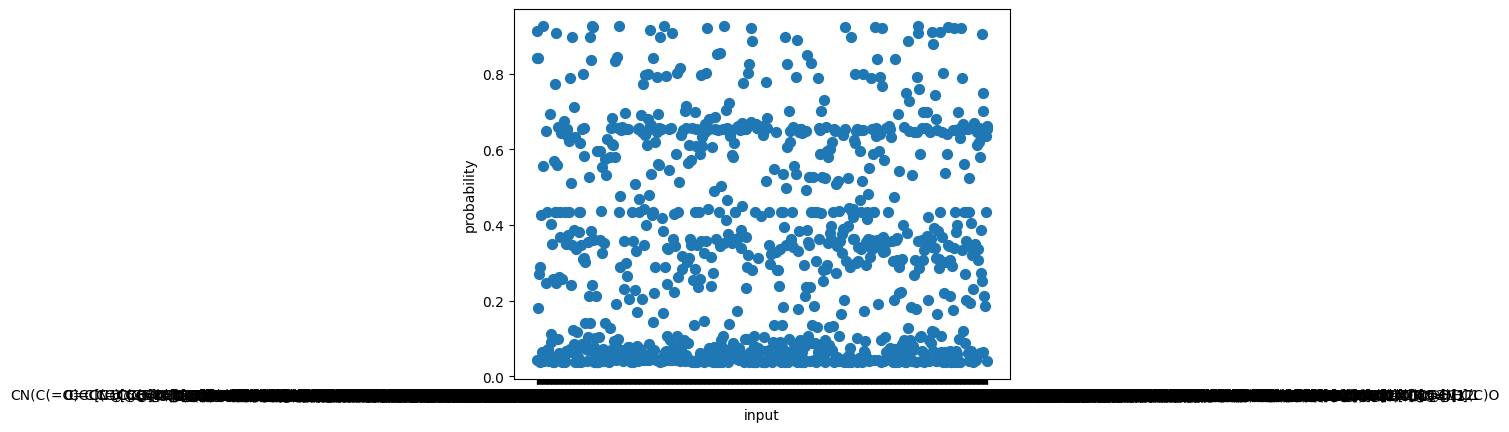

In [20]:
output.plot.scatter(x = 'input', y = 'probability', s = 50);